# `Naïve Bayes Spam Email Filtering By (MultinomialNB) & (Pipeline)`

**4 Applications of Naive Bayes Algorithms:**

**`Real time Prediction:`** `Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.`

**`Multi class Prediction:`** `This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.`

**`Text classification/ Spam Filtering/ Sentiment Analysis:`** `Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)`

**`Recommendation System:`** `Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not`

-------------------------------------------------------------------------
**How to build a basic model using Naive Bayes in Python:** **`scikit learn`** `(python library) will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under the scikit-learn library:`

**->** **`Gaussian:`** `It is used in classification and it assumes that features follow a normal distribution.`

**->** **`Multinomial:`** `It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.`

**->** **`Bernoulli:`** `The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.`

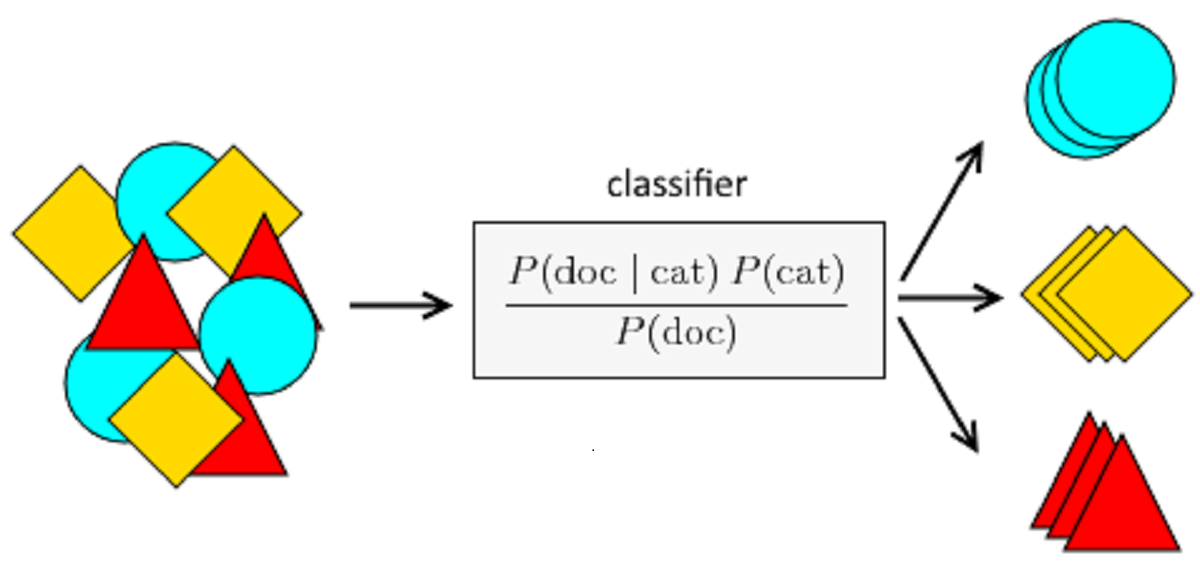

**To upload `.csv` file from my local drive:**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Spam_Mail_Data_Set.csv to Spam_Mail_Data_Set.csv


**To import it into a dataframe (make sure the filename matches the name of the uploaded file).**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

import io
df = pd.read_csv(io.BytesIO(uploaded['Spam_Mail_Data_Set.csv']))
# print(df)

pd.set_option('display.max_columns', None)
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


**Grouping By The `Category` & Describing It For Well Understanding:**

In [4]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

Create A New Column Name `spam` And In `spam` Column Store `ham == 0` & `spam == 1`.

In [5]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**Splite data for `training` and `testing` purpose (30%):**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size = 0.30)

**Size of `train` & `testing` Data:**

In [17]:
print(f"Size of X_test Data: {len(X_test)}")

print(f"Size of X_train Data: {len(X_train)}")

Size of X_test Data: 1672
Size of X_train Data: 3900


**`X_train_count` Is The Text Which Is The Email Message Convarted Into The Number Matrix**

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_count = v.fit_transform(X_train.values)

# 'X_train_count' convart into the array
X_train_count.toarray()[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Create A Multinomial Naïve Bayes classifier Model (`MultinomialNB`):**

In [16]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train_count,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**For Testing Take Two `emails`:**

In [27]:
emails_01 = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]


**`predict` The Result Of `emails_01` Array:**

In [28]:
emails_count = v.transform(emails_01)

model.predict(emails_count)

array([0, 1])

**Accuracy of the model (`MultinomialNB`):**

In [52]:
# 'X_test' convart into the number & store in X_test_count
X_test_count = v.transform(X_test)

model.score(X_test_count, y_test)

0.9838516746411483

# **`Sklearn Pipeline`**

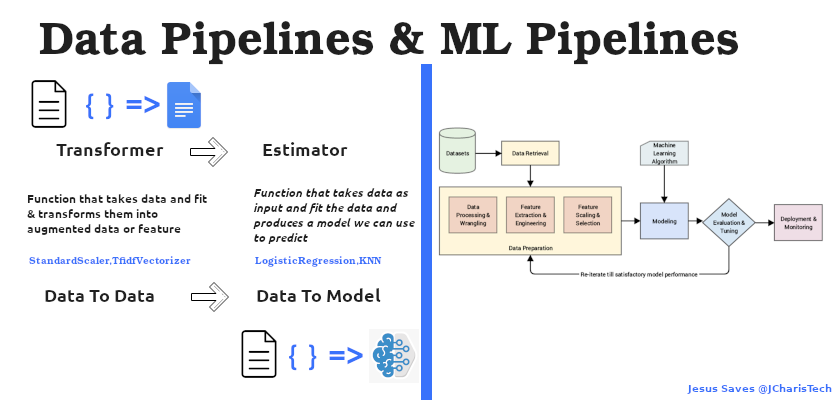

**Create a `Pipeline` Model:**

In [53]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),   # Convert the text into the vactor of count vactorizer
    ('nb', MultinomialNB())      # Apply the Multinomial Naïve Bayes
])

**Train the Model(`Pipeline`):**

In [54]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**For Testing Take Seven `emails`:**

In [55]:
emails_02 = [
    'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL',
    'Oh k...im watching here',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'Abhishek, Are you know I am fall in love.?',
    'Greetings from the Department of Information Technology, JIS College of Engineering !!!!',
    'Nagarro Software is the subsidiary of US based MNC Nagarro Inc. Nagarro has a global presence and has offices in US, Germany, Sweden and India.',
    'Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!'
]

**`predict` The Result Of `emails_02` Array:**

In [56]:
clf.predict(emails_02)

array([1, 0, 1, 0, 0, 0, 1])

**Accuracy of the model (`Pipeline`):**

In [57]:
clf.score(X_test,y_test)

0.9838516746411483

[**`AMARTA KUNDU:)`**](https://github.com/AMARTA7/)

In [58]:
print("Made by AMARTA KUNDU. IT, JISCE.")

Made by AMARTA KUNDU. IT, JISCE.
